<a href="https://colab.research.google.com/github/PankajSingh013/Deep_learning/blob/main/Handwritten_digits_NN_(simple).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [20]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

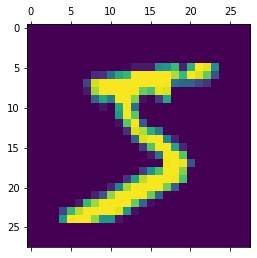

In [21]:
#show the image using matplot lib
plt.matshow(X_train[0])

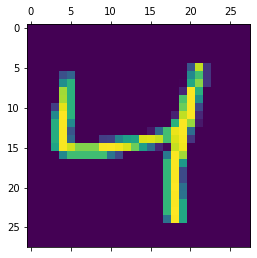

In [22]:
plt.matshow(X_train[2])

In [23]:
y_train[2] #contains number between 0-9

4

In [31]:
#scaling the data

X_train = X_train/255
X_test = X_test/255

In [32]:
#flatten the 28*28 image using rshape function of numpy  so that we can feed it into our NN

X_train_flattened = X_train.reshape(len(X_train),28*28)

In [33]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [34]:
X_train.shape , X_test.shape


((60000, 28, 28), (10000, 28, 28))

In [28]:
X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [29]:
#lets create a simple NN with two layers only (input and output layer ( with no hidden layer))

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs = 6)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4657 - accuracy: 0.8787
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3033 - accuracy: 0.9152
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2829 - accuracy: 0.9211
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9244
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2661 - accuracy: 0.9261
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9269


In [36]:
#accuracy without scaling the data is around 88 % and loss is also high. we can impure accuracy of our simple model further by scaling (Normalizing) our data by 255

#as you can above after scaling the loss is redcued and the accuracy is also increased to 92 % on our training data


In [39]:
#evaluate the model on test data
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2657 - accuracy: 0.9258


[0.2657206952571869, 0.9258000254631042]

In [43]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


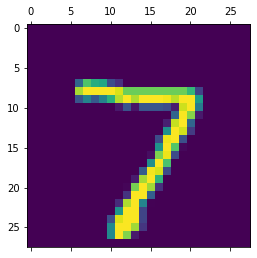

In [44]:
plt.matshow(X_test[0])

In [52]:
y_test[0]

7

In [46]:
y_predicted[0] # its in the form of probability scores array

array([1.8839695e-02, 3.2779479e-07, 4.2236254e-02, 9.6445757e-01,
       2.9171824e-03, 1.4162683e-01, 7.8174673e-07, 9.9988198e-01,
       1.5285018e-01, 7.3726368e-01], dtype=float32)

In [48]:
#it will basically give the probality score of all the 10 classes. to find the index of max probability we will use argmax function. The predicted class is 7 as belo
np.argmax(y_predicted[0])

7

so the test accuracy of our simple hand written digit recognition model having only input and out layers is 92 %

In [53]:
#to convert our output form into an array of exact predictions we will use the argmax function of mumpy
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [56]:
y_predicted_labels[0]

7

In [60]:
#to get the exact performance of model lets buid a confusion metrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    0,    2,    0,    5,    7,    3,    3,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   5,   11,  919,   17,    9,    3,   13,   12,   39,    4],
       [   3,    1,   18,  909,    0,   28,    4,   13,   27,    7],
       [   1,    2,    2,    1,  919,    0,   13,    4,    9,   31],
       [   9,    3,    2,   30,   10,  768,   20,    9,   35,    6],
       [  11,    3,    6,    1,    7,   10,  916,    2,    2,    0],
       [   2,    8,   21,    4,    7,    0,    0,  956,    2,   28],
       [   5,   12,    5,   15,    9,   19,   10,   12,  879,    8],
       [  10,    7,    1,    7,   26,    6,    0,   28,    9,  915]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

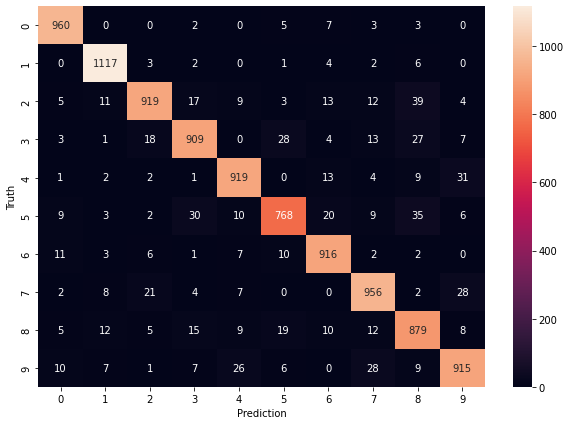

In [65]:
#lets use seaborn to plot it more visually
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Now lets create a NN with one dense hidden layer having 100 neurons**

In [71]:
model_2=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), # we pass input shape for our very first layer. for later layers models calculates own its own
    keras.layers.Dense(10,activation='sigmoid')
])

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_2.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2785 - accuracy: 0.9207
Epoch 2/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1291 - accuracy: 0.9614
Epoch 3/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0873 - accuracy: 0.9732
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0648 - accuracy: 0.9803
Epoch 5/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0517 - accuracy: 0.9845
Epoch 6/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9873


In [72]:
model_2.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0812 - accuracy: 0.9757


[0.08122309297323227, 0.9757000207901001]

In [ ]:
#so the accuracy on our test data is 97% by using only one hidden layer

313/313 [==============================] - 0s 1ms/step


Text(33.0, 0.5, 'Truth')

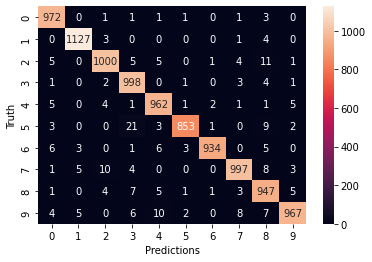

In [75]:
y_predicted = model_2.predict(X_test_flattened)
y_predicted_labels = [ np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predictions')
plt.ylabel('Truth')

In [ ]:
#as we see about there are more no. of correctly predicted poins in diagonal 

In [77]:
#to avoid doing the flattening on of the input tensor we will use the tensorflow Flatten layer itself for our work. so we don't need to compute x_train_flattened on our own

In [78]:
model_3=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), # we pass input shape for our very first layer. for later layers models calculates own its own
    keras.layers.Dense(10,activation='sigmoid')
])

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model_3.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2774 - accuracy: 0.9204
Epoch 2/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1294 - accuracy: 0.9618
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0898 - accuracy: 0.9727
Epoch 4/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0696 - accuracy: 0.9785
Epoch 5/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0551 - accuracy: 0.9823
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0451 - accuracy: 0.9862
